In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [23]:
df = pd.read_csv('D3.csv')
df.head()
M = len(df)
M

100

In [24]:
X1 = df.values[:, 0] #gets input values from 1st column
X2 = df.values[:, 1] #gets input values from 2nd column
X3 = df.values[:, 2] #gets input values from 3rd column
Y = df.values[:, 3] #gets output values from 4th column
m = len(Y) # Number of training examples
print('X1 = ', X1[: 5]) #Show first 5 values
print('X2 = ', X2[: 5]) #Show first 5 values
print('X3 = ', X3[: 5]) #Show first 5 values
print('Y = ', Y[: 5])
print('m = ', m)

X1 =  [0.         0.04040404 0.08080808 0.12121212 0.16161616]
X2 =  [3.44       0.1349495  0.82989899 1.52484848 2.21979798]
X3 =  [0.44       0.88848485 1.3369697  1.78545454 2.23393939]
Y =  [4.38754501 2.6796499  2.96848981 3.25406475 3.53637472]
m =  100


In [25]:
#Creating matrix with single column of ones
X_0 = np.ones((m, 1))
X_0[:5] #Show 5 values of matrix

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.]])

In [26]:
#Reshape function used to convert X from 1D to 2D array of 100x1
X_1 = X1.reshape(m, 1)
X_2 = X2.reshape(m, 1)
X_3 = X3.reshape(m, 1)
X_1[:10], X_2[:10], X_3[:10] #Show first 10 values

(array([[0.        ],
        [0.04040404],
        [0.08080808],
        [0.12121212],
        [0.16161616],
        [0.2020202 ],
        [0.24242424],
        [0.28282828],
        [0.32323232],
        [0.36363636]]),
 array([[3.44      ],
        [0.1349495 ],
        [0.82989899],
        [1.52484848],
        [2.21979798],
        [2.91474747],
        [3.60969697],
        [0.30464646],
        [0.99959596],
        [1.69454546]]),
 array([[0.44      ],
        [0.88848485],
        [1.3369697 ],
        [1.78545454],
        [2.23393939],
        [2.68242424],
        [3.13090909],
        [3.57939394],
        [0.02787879],
        [0.47636364]]))

In [27]:
#hstack() function from numpy to have X_0 and X_1 in one final Matrix
X = np.hstack((X_0, X_1, X_2, X_3))
X[:5]

array([[1.        , 0.        , 3.44      , 0.44      ],
       [1.        , 0.04040404, 0.1349495 , 0.88848485],
       [1.        , 0.08080808, 0.82989899, 1.3369697 ],
       [1.        , 0.12121212, 1.52484848, 1.78545454],
       [1.        , 0.16161616, 2.21979798, 2.23393939]])

In [28]:
theta = np.zeros(4)
theta

array([0., 0., 0., 0.])

In [29]:
def compute_cost(X, Y, theta):
    predictions = X.dot(theta)
    errors = np.subtract(predictions, Y)
    sqrErrors = np.square(errors)
    J = 1 / (2 *m) * np.sum(sqrErrors)
    
    return J

In [31]:
cost = compute_cost(X, Y, theta)
print('The cost for given values of theta_0, theta_1, theta_2, theta_3 =', cost)

The cost for given values of theta_0, theta_1, theta_2, theta_3 = 5.524438459196242


In [32]:
def gradient_descent(X, Y, theta, aplha, iterations):
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = np.subtract(predictions, Y)
        sum_delta = (alpha / m) * X.transpose().dot(errors);
        theta = theta - sum_delta;
        cost_history[i] = compute_cost(X, Y, theta)
        
    return theta, cost_history

In [41]:
theta = [0., 0., 0., 0.]
iterations = 1500;
alpha = 0.05;

In [42]:
theta, cost_history = gradient_descent(X, Y, theta, alpha, iterations)
print('Final value of theta =', theta)
print('cost_history =', cost_history)

Final value of theta = [ 5.31128136 -2.0033116   0.5330402  -0.26517886]
cost_history = [4.35632837 3.99754934 3.73994659 ... 0.73846469 0.73846469 0.73846469]


Text(0.5, 1.0, 'Convergence of gradient descent')

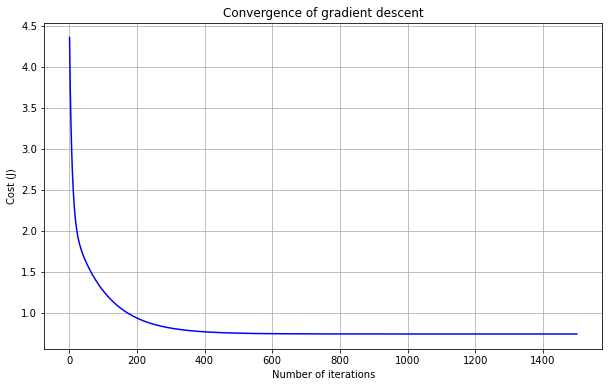

In [43]:
plt.plot(range(1, iterations + 1), cost_history, color = 'blue')
plt.rcParams["figure.figsize"] = (10,6)
plt.grid()
plt.xlabel('Number of iterations')
plt.ylabel('Cost (J)')
plt.title('Convergence of gradient descent')